## 1.1 강서구 인구밀도

In [40]:
import warnings

warnings.filterwarnings("ignore")

In [154]:
# import libaray and packages
%matplotlib inline
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


# prepare and read data
F1 = './POP/nlsp_030001001.shp' 
D1 = gpd.read_file(F1, encoding='utf-8')
D1.head()

,gid,lbl,val,geometry
0,다사44b50b,7274.00,7274.0,"POLYGON ((944500.000 1950500.000, 944500.000 1..."
1,다사43a51a,8520.00,8520.0,"POLYGON ((943000.000 1951000.000, 943000.000 1..."
2,다사41a51a,1328.00,1328.0,"POLYGON ((941000.000 1951000.000, 941000.000 1..."
3,다사43a50a,2700.00,2700.0,"POLYGON ((943000.000 1950000.000, 943000.000 1..."
4,다사39b51b,8887.00,8887.0,"POLYGON ((939500.000 1951500.000, 939500.000 1..."


<AxesSubplot:>

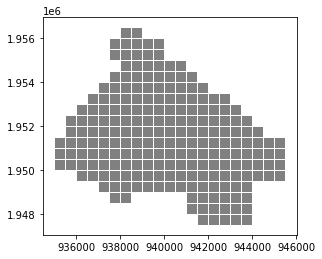

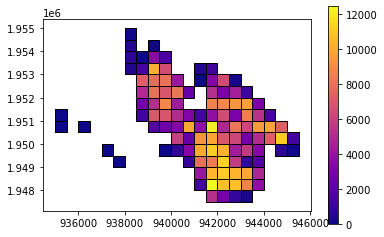

In [42]:
D1.convex_hull.plot(color='gray', edgecolor="w")
D1.plot(column='val', cmap='plasma', edgecolor='black', legend=True)

## 1.2 좌표계 변환

In [43]:
import pyproj
from fiona.crs import from_epsg

seoul = D1.to_crs(epsg=4326)
seoul

,gid,lbl,val,geometry
0,다사44b50b,7274.00,7274.0,"POLYGON ((126.87167 37.55217, 126.87163 37.556..."
1,다사43a51a,8520.00,8520.0,"POLYGON ((126.85465 37.55659, 126.85461 37.561..."
2,다사41a51a,1328.00,1328.0,"POLYGON ((126.83200 37.55646, 126.83196 37.560..."
3,다사43a50a,2700.00,2700.0,"POLYGON ((126.85473 37.54757, 126.85469 37.552..."
4,다사39b51b,8887.00,8887.0,"POLYGON ((126.81498 37.56087, 126.81494 37.565..."
...,...,...,...,...
209,다사38a50b,NaN,NaN,"POLYGON ((126.79808 37.55176, 126.79804 37.556..."
210,다사36b51b,NaN,NaN,"POLYGON ((126.78102 37.56067, 126.78097 37.565..."
211,다사43b52a,NaN,NaN,"POLYGON ((126.86023 37.56563, 126.86019 37.570..."
212,다사41a54a,NaN,NaN,"POLYGON ((126.83176 37.58350, 126.83172 37.588..."


## 1.3 수요지 노드

In [56]:
seoul2 = seoul.dropna(subset=['val'])
seoul2

,gid,lbl,val,geometry,centroid
0,다사44b50b,7274.00,7274.0,"POLYGON ((126.87167 37.55217, 126.87163 37.556...",POINT (126.87448 37.55444)
1,다사43a51a,8520.00,8520.0,"POLYGON ((126.85465 37.55659, 126.85461 37.561...",POINT (126.85746 37.55886)
2,다사41a51a,1328.00,1328.0,"POLYGON ((126.83200 37.55646, 126.83196 37.560...",POINT (126.83482 37.55873)
3,다사43a50a,2700.00,2700.0,"POLYGON ((126.85473 37.54757, 126.85469 37.552...",POINT (126.85754 37.54984)
4,다사39b51b,8887.00,8887.0,"POLYGON ((126.81498 37.56087, 126.81494 37.565...",POINT (126.81779 37.56314)
...,...,...,...,...,...
108,다사40b52a,2305.00,2305.0,"POLYGON ((126.82626 37.56544, 126.82622 37.569...",POINT (126.82907 37.56771)
109,다사39a52b,7878.00,7878.0,"POLYGON ((126.80924 37.56985, 126.80920 37.574...",POINT (126.81205 37.57212)
110,다사38b53a,1267.00,1267.0,"POLYGON ((126.80353 37.57432, 126.80349 37.578...",POINT (126.80634 37.57659)
111,다사39b53b,1588.00,1588.0,"POLYGON ((126.81482 37.57890, 126.81478 37.583...",POINT (126.81763 37.58117)


In [63]:

# Calculate centroids of grid polygons
seoul2['centroid'] = seoul2.centroid


# Extract centroid coordinates as a DataFrame
centroid_df = pd.DataFrame({'위도': seoul2['centroid'].y, '경도': seoul2['centroid'].x})

centroid_df

# Save the DataFrame to Excel
centroid_df.to_excel('demand_points.xlsx', index=False)


## 1.3 시각화 

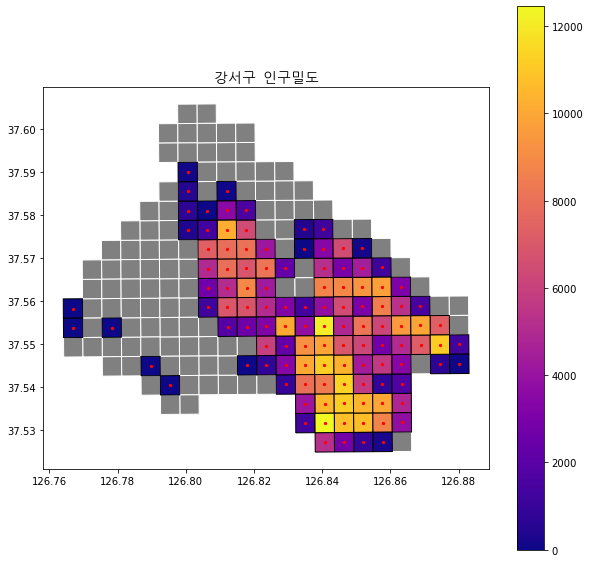

In [62]:
import matplotlib.font_manager as fm
from matplotlib.patches import Circle

# 한글 폰트 경로 설정
font_path = './data2/NanumGothic.ttf'  # 자신이 사용할 폰트 파일 경로로 수정해주세요.


# 폰트 설정
fontprop = fm.FontProperties(fname=font_path, size=14) 

fig, ax = plt.subplots(figsize=(10, 10))

seoul.convex_hull.plot(ax=ax, color='gray', edgecolor='w')
seoul.plot(column='val', cmap='plasma', edgecolor='black', legend=True, ax=ax)
seoul2.centroid.plot(ax=ax, color='red', markersize=5)  # Plotting centroids as red points

plt.title('강서구 인구밀도', fontproperties=fontprop)
plt.show()


# 2. 수요지 모델링

## 2.1 k-means 클러스터링

In [78]:
from sklearn.cluster import KMeans
import seaborn as sns

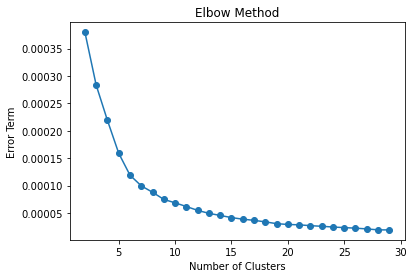

In [72]:
# Extract centroid coordinates as a DataFrame
centroid_df = pd.DataFrame({'위도': seoul2['centroid'].y, '경도': seoul2['centroid'].x})

# Specify the range of cluster numbers to try
num_of_clusters = range(2, 30)

# Initialize an empty list to store the error terms
error = []

# Perform K-means clustering with different cluster numbers
for num_clusters in num_of_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(centroid_df[['경도', '위도']].values)  # Convert coordinates to numeric values
    error.append(kmeans.inertia_/100)

# Create a DataFrame to store the results
table = pd.DataFrame({"Cluster_Numbers": num_of_clusters, "Error_Term": error})

table

# Plot the elbow curve
plt.plot(table['Cluster_Numbers'], table['Error_Term'], marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Error Term')
plt.title('Elbow Method')
plt.show()

- k가 7개 부터 에러 감소가 급격하게 줄어드는 것을 볼 수 있음

## 2.2 time series K-Means

In [76]:
# Perform K-means clustering with k=9
k = 9
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(centroid_df[['경도', '위도']].values)  # Convert coordinates to numeric values

# Add cluster labels to centroid DataFrame
centroid_df['Cluster'] = kmeans.labels_
centroid_df

,위도,경도,Cluster
0,37.554441,126.874479,6
1,37.558856,126.857458,2
2,37.558731,126.834815,5
3,37.549843,126.857536,2
4,37.563140,126.817792,8
...,...,...,...
108,37.567712,126.829074,8
109,37.572120,126.812048,1
110,37.576594,126.806344,1
111,37.581166,126.817627,1


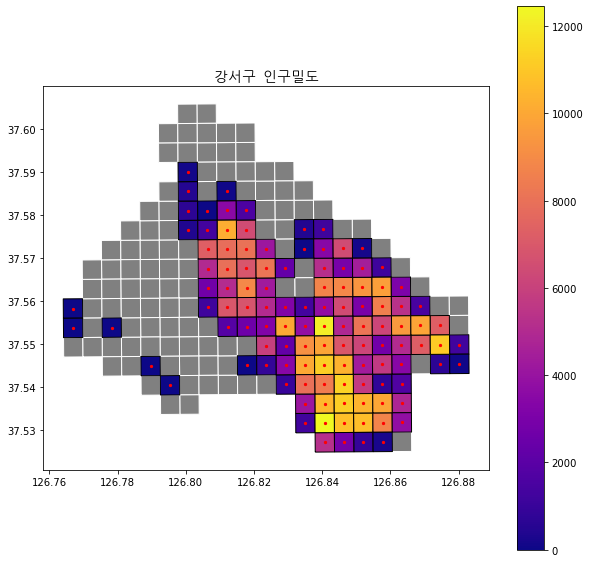

In [90]:
# Save the DataFrame with cluster information
centroid_df.to_excel('demand_points with_clusters.xlsx', index=False)

# Plot the clusters
fig, ax = plt.subplots(figsize=(10, 10))
seoul.convex_hull.plot(ax=ax, color='gray', edgecolor='w')
seoul.plot(column='val', cmap='plasma', edgecolor='black', legend=True, ax=ax)
for cluster_num in range(k):
    cluster_points = centroid_df[centroid_df['Cluster'] == cluster_num]
    ax.scatter(cluster_points['경도'], cluster_points['위도'], color='red', s=5)
plt.title('강서구 인구밀도', fontproperties=fontprop)
plt.show()

- 클러스터링 한 부분 엑셀로 저장

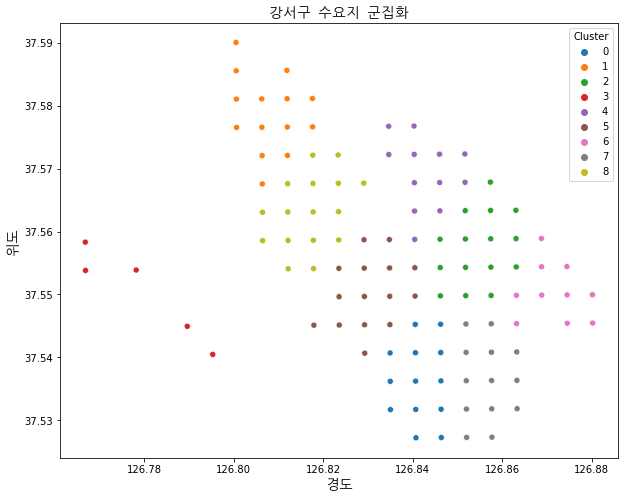

In [88]:
# 폰트 설정
fontprop = fm.FontProperties(fname=font_path, size=14) 

# Plot clustering results
plt.figure(figsize=(10, 8))
sns.scatterplot(data=centroid_df, x='경도', y='위도', hue='Cluster', palette='tab10')
plt.title('강서구 수요지 군집화', fontproperties=fontprop)
plt.xlabel('경도', fontproperties=fontprop)
plt.ylabel('위도', fontproperties=fontprop)
plt.legend(title='Cluster', loc='upper right')
plt.show()

In [94]:
# Add 'Cluster' column from centroid_df to seoul2 DataFrame
seoul2['Cluster'] = centroid_df['Cluster']
seoul2

,gid,lbl,val,geometry,centroid,Cluster
0,다사44b50b,7274.00,7274.0,"POLYGON ((126.87167 37.55217, 126.87163 37.556...",POINT (126.87448 37.55444),6
1,다사43a51a,8520.00,8520.0,"POLYGON ((126.85465 37.55659, 126.85461 37.561...",POINT (126.85746 37.55886),2
2,다사41a51a,1328.00,1328.0,"POLYGON ((126.83200 37.55646, 126.83196 37.560...",POINT (126.83482 37.55873),5
3,다사43a50a,2700.00,2700.0,"POLYGON ((126.85473 37.54757, 126.85469 37.552...",POINT (126.85754 37.54984),2
4,다사39b51b,8887.00,8887.0,"POLYGON ((126.81498 37.56087, 126.81494 37.565...",POINT (126.81779 37.56314),8
...,...,...,...,...,...,...
108,다사40b52a,2305.00,2305.0,"POLYGON ((126.82626 37.56544, 126.82622 37.569...",POINT (126.82907 37.56771),8
109,다사39a52b,7878.00,7878.0,"POLYGON ((126.80924 37.56985, 126.80920 37.574...",POINT (126.81205 37.57212),1
110,다사38b53a,1267.00,1267.0,"POLYGON ((126.80353 37.57432, 126.80349 37.578...",POINT (126.80634 37.57659),1
111,다사39b53b,1588.00,1588.0,"POLYGON ((126.81482 37.57890, 126.81478 37.583...",POINT (126.81763 37.58117),1


In [95]:
# Save the DataFrame to Excel
seoul2.to_excel('seoul_data_with_clusters_val.xlsx', index=False)

In [96]:
import geopandas as gpd
from sklearn.cluster import KMeans

# Create separate DataFrames for each cluster
cluster_dataframes = []
for cluster_num in range(k):
    cluster_df = seoul2[seoul2['Cluster'] == cluster_num]
    cluster_dataframes.append(cluster_df)

# Print the cluster dataframes
for idx, cluster_df in enumerate(cluster_dataframes):
    print(f"Cluster {idx}:\n{cluster_df}\n")

# Save each cluster dataframe to Excel
for idx, cluster_df in enumerate(cluster_dataframes):
    cluster_df.to_excel(f'cluster_{idx}.xlsx', index=False)


Cluster 0:
          gid       lbl      val  \
13   다사41b47b   5249.00   5249.0   
15   다사41b48b  10479.00  10479.0   
27   다사42a48b  11207.00  11207.0   
32   다사41b49b  11229.00  11229.0   
41   다사42a49a  11333.00  11333.0   
44   다사41a48a   1223.00   1223.0   
46   다사42a48a  10775.00  10775.0   
53   다사42a49b  10328.00  10328.0   
76   다사42a47b   2794.00   2794.0   
96   다사41b48a  12453.00  12453.0   
99   다사41b49a   8427.00   8427.0   
101  다사41a48b   4089.00   4089.0   
112  다사41a49a   7957.00   7957.0   

                                              geometry  \
13   POLYGON ((126.83794 37.52495, 126.83790 37.529...   
15   POLYGON ((126.83786 37.53396, 126.83782 37.538...   
27   POLYGON ((126.84352 37.53399, 126.84348 37.538...   
32   POLYGON ((126.83779 37.54297, 126.83775 37.547...   
41   POLYGON ((126.84348 37.53850, 126.84344 37.543...   
44   POLYGON ((126.83225 37.52942, 126.83221 37.533...   
46   POLYGON ((126.84356 37.52949, 126.84352 37.533...   
53   POLYGON ((126.8

## 2.1 기존 후보지

In [104]:
df1 = pd.read_csv('./강서구 이재민 대피소.csv', encoding='utf-8')
df1

,지역코드,시설일련번호,시도명,시군구명,시설구분코드,시설구분,시설명,도로명주소코드,법정동코드,행정동코드,상세주소,시설면적,주거능력,경도,위도,관리부서,지자체담당자연락처,수용인원,최대수용인원,geometry
0,1150000000,357,서울특별시,강서구,3,경로당,봉바위 경로당,1150010300110610036019166,1.150010e+09,1150061500,서울특별시 강서구 강서로34길 34(화곡동),90,34,126.841577,37.543132,최송자,NaN,62,108,POINT (126.84157703 37.54313157)
1,1150000000,340,서울특별시,강서구,1,학교,염경초등학교,1150010100100790000028128,1.150010e+09,1150051000,서울특별시 강서구 양천로69길 49(염창동),843,324,126.871235,37.554774,조유나,NaN,589,1011,POINT (126.87123471 37.55477385)
2,1150000000,422,서울특별시,강서구,1,학교,염경중학교,1150010100100790000028255,1.150010e+09,1150051000,서울특별시 강서구 양천로69길 35(염창동),690,265,126.870684,37.554496,송채정,NaN,482,828,POINT (126.870684 37.554496)
3,1150000000,341,서울특별시,강서구,3,경로당,염창강변 경로당,1150010100101140002028129,1.150010e+09,1150051000,서울특별시 강서구 양천로77길 58-25 (염창동),116,44,126.875859,37.551564,최순홍,NaN,81,139,POINT (126.87585879 37.55156368)
4,1150000000,432,서울특별시,강서구,13,"연수,숙박",JK블라썸 호텔,1150010100100200085027473,1.150010e+09,1150051000,서울특별시 강서구 양천로65길 41-22 (염창동),8284,672,126.867609,37.556842,이재관,NaN,5793,9940,POINT (126.86760914 37.55684224)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,1150000000,434,서울특별시,강서구,3,경로당,동부경로당(방화1동),1150010900101680087004753,1.150011e+09,1150063000,서울특별시 강서구 양천로28길 12-9 (방화동),98,37,126.819849,37.572534,황영길,NaN,68,117,POINT (126.81984909 37.57253425)
83,1150000000,392,서울특별시,강서구,14,"공공시설(국·공립도서관, 공립병원, 시·도민회관, 구민회관 주민체육시설, 노인병원,...",방화11종합사회복지관,1150010900108510000001415,1.150011e+09,1150064000,"서울특별시 강서구 개화동로21길 4(방화동, 방화11단지아파트)",123,47,126.805531,37.570145,신택원,NaN,86,147,POINT (126.805531 37.5701452)
84,1150000000,393,서울특별시,강서구,14,"공공시설(국·공립도서관, 공립병원, 시·도민회관, 구민회관 주민체육시설, 노인병원,...",방화6종합사회복지관,1150010900108160000000206,1.150011e+09,1150064100,"서울특별시 강서구 금낭화로23길 25(방화동, 방화6단지아파트)",81,31,126.810839,37.578400,심혜수,NaN,56,97,POINT (126.81083884 37.57840035)
85,1150000000,394,서울특별시,강서구,14,"공공시설(국·공립도서관, 공립병원, 시·도민회관, 구민회관 주민체육시설, 노인병원,...",방화2종합사회복지관 (우정),1150010900108390000000213,1.150011e+09,1150064100,"서울특별시 강서구 방화대로48길 40(방화동, 방화2단지아파트)",88,33,126.818740,37.574777,김민교,NaN,61,105,POINT (126.81873984 37.57477652)


- nan 값인 데이터만 추출

## 2.2 기존 대피소 시각화

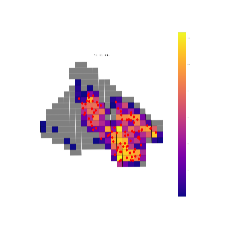

In [35]:
# 지도 그리기 코드
fig, ax = plt.subplots(figsize=(30, 30))
# 폰트 설정
fontprop = fm.FontProperties(fname=font_path, size=20) 

x0 = df1['경도'].astype(float).tolist()  # 경도 값을 실수로 변환하여 할당
y0 = df1['위도'].astype(float).tolist()  # 위도 값을 실수로 변환하여 할당

ax2 = seoul.convex_hull.plot(ax=ax, color='gray', edgecolor='w')
ax2 =  seoul.plot(column='val', cmap='plasma', edgecolor='black', legend=True, ax=ax)
#ax2 = new_seoul.convex_hull.plot(color='#F8DFDF', edgecolor="w")

# 동그라미로 대피소 표시하는 코드
for x, y in zip(x0, y0):
    circle = Circle((x, y), radius=0.001, facecolor='red', edgecolor='red')
    ax2.add_patch(circle)
ax2.set_axis_off()

# 지도 이름과 범례 추가
plt.title("서울 기존 대피소", fontproperties=fontprop)  # 지도 이름

# 이미지 저장
plt.savefig('기존 대피소.png', dpi=300)
plt.close()

# 이미지 표시
image = plt.imread('기존 대피소.png')
plt.imshow(image)
plt.axis('off')
plt.show()

# 3. 후보지 모델링

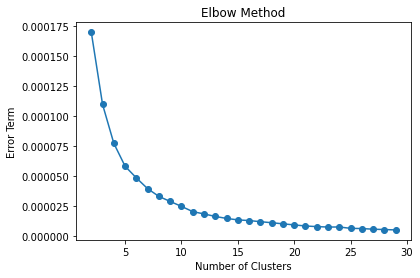

In [105]:
# Specify the range of cluster numbers to try
num_of_clusters = range(2, 30)

# Initialize an empty list to store the error terms
error = []

# Perform K-means clustering with different cluster numbers
for num_clusters in num_of_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(df1[['경도', '위도']].values)  # Convert coordinates to numeric values
    error.append(kmeans.inertia_/100)

# Create a DataFrame to store the results
table = pd.DataFrame({"Cluster_Numbers": num_of_clusters, "Error_Term": error})

table

# Plot the elbow curve
plt.plot(table['Cluster_Numbers'], table['Error_Term'], marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Error Term')
plt.title('Elbow Method')
plt.show()

In [110]:
# Perform K-means clustering with k=9
k = 7
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(df1[['경도', '위도']].values)  # Convert coordinates to numeric values

# Add cluster labels to centroid DataFrame
df1['Cluster'] = kmeans.labels_
df1

,지역코드,시설일련번호,시도명,시군구명,시설구분코드,시설구분,시설명,도로명주소코드,법정동코드,행정동코드,...,시설면적,주거능력,경도,위도,관리부서,지자체담당자연락처,수용인원,최대수용인원,geometry,Cluster
0,1150000000,357,서울특별시,강서구,3,경로당,봉바위 경로당,1150010300110610036019166,1.150010e+09,1150061500,...,90,34,126.841577,37.543132,최송자,NaN,62,108,POINT (126.84157703 37.54313157),6
1,1150000000,340,서울특별시,강서구,1,학교,염경초등학교,1150010100100790000028128,1.150010e+09,1150051000,...,843,324,126.871235,37.554774,조유나,NaN,589,1011,POINT (126.87123471 37.55477385),0
2,1150000000,422,서울특별시,강서구,1,학교,염경중학교,1150010100100790000028255,1.150010e+09,1150051000,...,690,265,126.870684,37.554496,송채정,NaN,482,828,POINT (126.870684 37.554496),0
3,1150000000,341,서울특별시,강서구,3,경로당,염창강변 경로당,1150010100101140002028129,1.150010e+09,1150051000,...,116,44,126.875859,37.551564,최순홍,NaN,81,139,POINT (126.87585879 37.55156368),0
4,1150000000,432,서울특별시,강서구,13,"연수,숙박",JK블라썸 호텔,1150010100100200085027473,1.150010e+09,1150051000,...,8284,672,126.867609,37.556842,이재관,NaN,5793,9940,POINT (126.86760914 37.55684224),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,1150000000,434,서울특별시,강서구,3,경로당,동부경로당(방화1동),1150010900101680087004753,1.150011e+09,1150063000,...,98,37,126.819849,37.572534,황영길,NaN,68,117,POINT (126.81984909 37.57253425),1
83,1150000000,392,서울특별시,강서구,14,"공공시설(국·공립도서관, 공립병원, 시·도민회관, 구민회관 주민체육시설, 노인병원,...",방화11종합사회복지관,1150010900108510000001415,1.150011e+09,1150064000,...,123,47,126.805531,37.570145,신택원,NaN,86,147,POINT (126.805531 37.5701452),1
84,1150000000,393,서울특별시,강서구,14,"공공시설(국·공립도서관, 공립병원, 시·도민회관, 구민회관 주민체육시설, 노인병원,...",방화6종합사회복지관,1150010900108160000000206,1.150011e+09,1150064100,...,81,31,126.810839,37.578400,심혜수,NaN,56,97,POINT (126.81083884 37.57840035),1
85,1150000000,394,서울특별시,강서구,14,"공공시설(국·공립도서관, 공립병원, 시·도민회관, 구민회관 주민체육시설, 노인병원,...",방화2종합사회복지관 (우정),1150010900108390000000213,1.150011e+09,1150064100,...,88,33,126.818740,37.574777,김민교,NaN,61,105,POINT (126.81873984 37.57477652),1


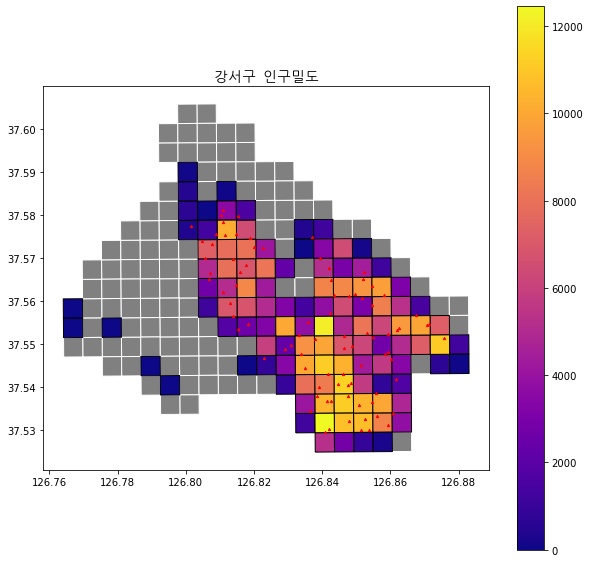

In [125]:

# Plot the clusters
fig, ax = plt.subplots(figsize=(10, 10))
seoul.convex_hull.plot(ax=ax, color='gray', edgecolor='w')
seoul.plot(column='val', cmap='plasma', edgecolor='black', legend=True, ax=ax)
for cluster_num in range(k):
    cluster_points = df1[df1['Cluster'] == cluster_num]
    ax.scatter(cluster_points['경도'], cluster_points['위도'], color='red', marker='^', s=5)
    plt.title('강서구 인구밀도', fontproperties=fontprop)
plt.show()

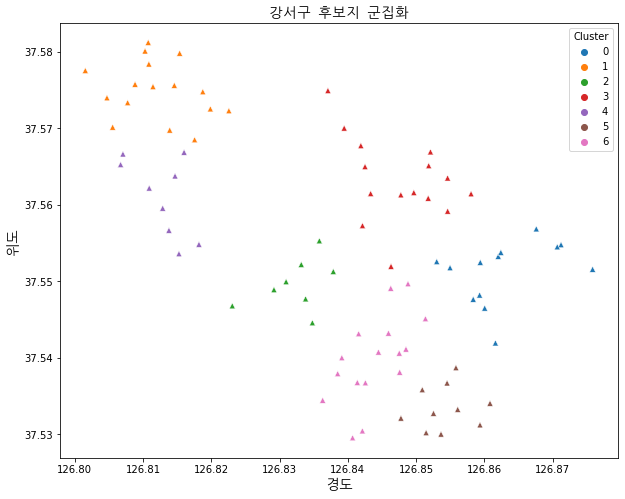

In [127]:
# 폰트 설정
fontprop = fm.FontProperties(fname=font_path, size=14)

# Plot clustering results
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df1, x='경도', y='위도', hue='Cluster', palette='tab10', marker='^')
plt.title('강서구 후보지 군집화', fontproperties=fontprop)
plt.xlabel('경도', fontproperties=fontprop)
plt.ylabel('위도', fontproperties=fontprop)
plt.legend(title='Cluster', loc='upper right')
plt.show()


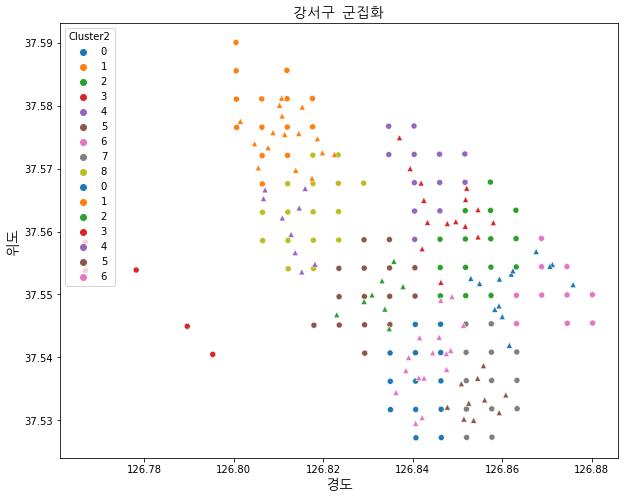

In [146]:
# 폰트 설정
fontprop = fm.FontProperties(fname=font_path, size=14)

# Plot clustering results
plt.figure(figsize=(10, 8))
sns.scatterplot(data=centroid_df, x='경도', y='위도', hue='Cluster', palette='tab10')
sns.scatterplot(data=df1, x='경도', y='위도', hue='Cluster', palette='tab10', marker='^')
plt.title('강서구 군집화', fontproperties=fontprop)
plt.xlabel('경도', fontproperties=fontprop)
plt.ylabel('위도', fontproperties=fontprop)
plt.legend(title='Cluster', loc='upper right')
plt.show()

In [144]:
# Create separate DataFrames for each cluster
cluster_dataframes2 = []
for cluster_num in range(k):
    cluster_df = df1[df1['Cluster'] == cluster_num]
    cluster_dataframes.append(cluster_df)

# Print the cluster dataframes
for idx, cluster_df in enumerate(cluster_dataframes2):
    print(f"Cluster {idx}:\n{cluster_df}\n")

# Save each cluster dataframe to Excel
for idx, cluster_df in enumerate(cluster_dataframes):
    cluster_df.to_excel(f'cluster_fa{idx}.xlsx', index=False)

# 4. 추가 후보지

In [163]:
df = gpd.read_file('./hubo_h90_s7.geojson',encoding='utf-8', dtype=str)

In [164]:
df

,건물명칭,에너지절감률(%),주차장면제(대),호,Unnamed: 0,동명칭,연면적(㎡),건폐율(%),친환경인증등급,주차장_기계식_옥내(대),...,지하층수(층),도로명주소,허가일자,주차장_기계식_인근(대),용도,노후화,연면적수용인원_1.43,연면적수용인원_1.2,연면적수용인원_0.825,geometry
0,동은교회,0.0,0,0,22,교육관,342.05,49.790000,NaN,0,...,0,서울특별시 강서구 남부순환로11가길 27-7,2007-06-08,0,종교시설,16.0,239,285,414,POINT (183495.736 550611.451)
1,발산동교회,0.0,0,0,26,발산동교회,1300.16,38.300000,NaN,0,...,1,서울특별시 강서구 공항대로36길 33,2005-06-14,0,종교시설,18.0,909,1083,1575,POINT (185614.008 550861.765)
2,기독교대한감리회 하늘빛교회,0.0,0,0,30,NaN,8446.45,49.860000,NaN,0,...,4,서울특별시 강서구 강서로 286,2011-04-15,0,종교시설,12.0,5906,7038,10238,POINT (185569.179 550197.920)
3,발음교회,0.0,0,0,31,NaN,7519.97,49.690000,NaN,0,...,3,서울특별시 강서구 강서로47다길,2010-11-26,0,종교시설,12.0,5258,6266,9115,POINT (185366.524 550219.540)
4,성민교회,0.0,0,0,33,NaN,1624.12,59.980000,NaN,0,...,1,서울특별시 강서구 강서로47길 142,2009-12-11,0,종교시설,13.0,1135,1353,1968,POINT (184824.210 550485.787)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,개구리어린이집,0.0,0,0,160,NaN,296.63,59.978991,NaN,0,...,0,서울특별시 강서구 초록마을로24길 21-4,2016-11-02,0,노유자시설,6.0,207,247,359,POINT (186804.657 548866.526)
195,강서어린이집,0.0,0,0,188,NaN,310.20,59.550000,NaN,0,...,0,서울특별시 강서구 까치산로22길 10,2005-10-24,0,노유자시설,17.0,216,258,376,POINT (186879.919 549945.546)
196,화곡동유치원,0.0,0,0,190,화곡동유치원,494.86,59.780000,NaN,0,...,0,서울특별시 강서구 까치산로 116,2006-11-03,0,노유자시설,16.0,346,412,599,POINT (186751.747 549866.082)
197,보미어린이집,0.0,0,0,192,NaN,663.04,59.830000,NaN,0,...,1,서울특별시 강서구 화곡로44나길 25,2007-09-28,0,노유자시설,15.0,463,552,803,POINT (186666.245 549890.369)


In [165]:
import pyproj
from fiona.crs import from_epsg

fa = df.to_crs(epsg=4326)
fa

,건물명칭,에너지절감률(%),주차장면제(대),호,Unnamed: 0,동명칭,연면적(㎡),건폐율(%),친환경인증등급,주차장_기계식_옥내(대),...,지하층수(층),도로명주소,허가일자,주차장_기계식_인근(대),용도,노후화,연면적수용인원_1.43,연면적수용인원_1.2,연면적수용인원_0.825,geometry
0,동은교회,0.0,0,0,22,교육관,342.05,49.790000,NaN,0,...,0,서울특별시 강서구 남부순환로11가길 27-7,2007-06-08,0,종교시설,16.0,239,285,414,POINT (126.81322 37.55488)
1,발산동교회,0.0,0,0,26,발산동교회,1300.16,38.300000,NaN,0,...,1,서울특별시 강서구 공항대로36길 33,2005-06-14,0,종교시설,18.0,909,1083,1575,POINT (126.83719 37.55717)
2,기독교대한감리회 하늘빛교회,0.0,0,0,30,NaN,8446.45,49.860000,NaN,0,...,4,서울특별시 강서구 강서로 286,2011-04-15,0,종교시설,12.0,5906,7038,10238,POINT (126.83669 37.55119)
3,발음교회,0.0,0,0,31,NaN,7519.97,49.690000,NaN,0,...,3,서울특별시 강서구 강서로47다길,2010-11-26,0,종교시설,12.0,5258,6266,9115,POINT (126.83440 37.55138)
4,성민교회,0.0,0,0,33,NaN,1624.12,59.980000,NaN,0,...,1,서울특별시 강서구 강서로47길 142,2009-12-11,0,종교시설,13.0,1135,1353,1968,POINT (126.82825 37.55377)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,개구리어린이집,0.0,0,0,160,NaN,296.63,59.978991,NaN,0,...,0,서울특별시 강서구 초록마을로24길 21-4,2016-11-02,0,노유자시설,6.0,207,247,359,POINT (126.85070 37.53921)
195,강서어린이집,0.0,0,0,188,NaN,310.20,59.550000,NaN,0,...,0,서울특별시 강서구 까치산로22길 10,2005-10-24,0,노유자시설,17.0,216,258,376,POINT (126.85153 37.54893)
196,화곡동유치원,0.0,0,0,190,화곡동유치원,494.86,59.780000,NaN,0,...,0,서울특별시 강서구 까치산로 116,2006-11-03,0,노유자시설,16.0,346,412,599,POINT (126.85008 37.54822)
197,보미어린이집,0.0,0,0,192,NaN,663.04,59.830000,NaN,0,...,1,서울특별시 강서구 화곡로44나길 25,2007-09-28,0,노유자시설,15.0,463,552,803,POINT (126.84911 37.54843)


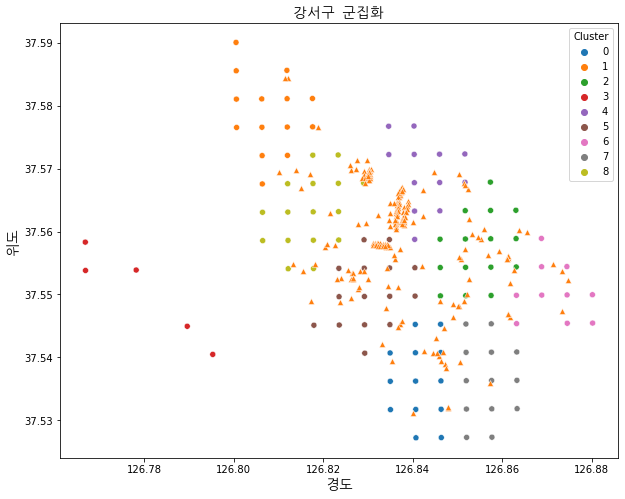

In [166]:
# 폰트 설정
fontprop = fm.FontProperties(fname=font_path, size=14)

# Plot clustering results
plt.figure(figsize=(10, 8))
sns.scatterplot(data=centroid_df, x='경도', y='위도', hue='Cluster', palette='tab10')
sns.scatterplot(data=df, x='경도', y='위도', marker='^')
plt.title('강서구 군집화', fontproperties=fontprop)
plt.xlabel('경도', fontproperties=fontprop)
plt.ylabel('위도', fontproperties=fontprop)
plt.legend(title='Cluster', loc='upper right')
plt.show()